# **READ AND SHOW IMAGE**

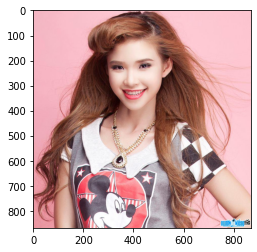

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/My Drive/Dataset/du.jpg')
imgplot = plt.imshow(img)
plt.show()

## **DETECT FACE**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the cascade
def showImage(name):
    face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Dataset/haarcascade_frontalface_default.xml')
# Read the input image
    img = cv2.imread(name)
# Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        break
# Display the output
#cv2.imshow('img', img)
    #cv2_imshow(img)
    #cv2.waitKey()
    return img

## **AGE PREDICTION**

In [ ]:
def show_predict(img):
    face_img = img.copy()
    MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
    age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
    age_list = age_list[::-1]
    blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
    ageProto = "/content/drive/My Drive/Dataset/age_deploy.prototxt"
    ageModel = "/content/drive/My Drive/Dataset/age_net.caffemodel"
    age_net = cv2.dnn.readNetFromCaffe(ageProto, ageModel)

    age_net.setInput(blob)
    age_preds = age_net.forward()
    age = age_list[age_preds[0].argmax()]
    print("Age Range: " + age)

    overlay_text = "%s" % (age)
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(img, overlay_text, (x, y), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2_imshow(img)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg
Age Range: (48, 53)


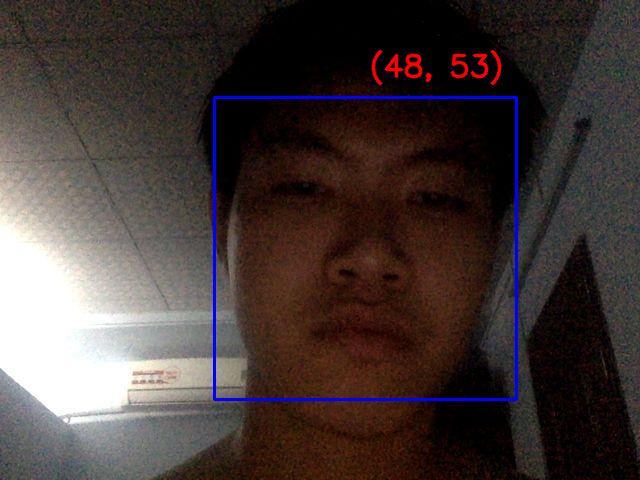

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  img = showImage(filename)
  show_predict(img)
  
  # Show the image which was just taken.
  #display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))